<a href="https://colab.research.google.com/github/Vishwanath-Ayyappan/ECE-GY-6123-Image-and-Video-Processing/blob/main/CA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMPUTER ASSIGNMENT 1


## PART 1


### [TODO - 1]

- Write the code to load the image here

In [ ]:
%matplotlib inline
# Importing necessary libraries and dependencies
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
# Loading the Image
image_colors = cv2.imread('colors.jpg', 1)

- Print the size of the image loaded

In [ ]:
#Printing the size of the image
print(image_colors.shape[0],"x",image_colors.shape[1])

300 x 450


- Code to **display results**. If using matplotlib.pyplot to display image, convert to RGB for correct color display.

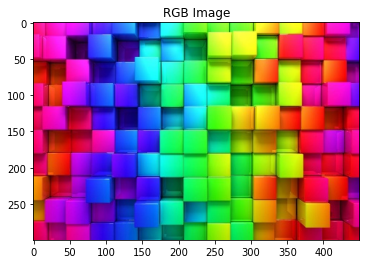

In [ ]:
# Converting BGR format to RGB format
image_colors_RGB = cv2.cvtColor(image_colors,cv2.COLOR_BGR2RGB)
# Displaying the Image
plt.imshow(image_colors_RGB)
plt.title('RGB Image')
plt.show()
cv2.imwrite('Colors_RBG_image.png',image_colors_RGB);

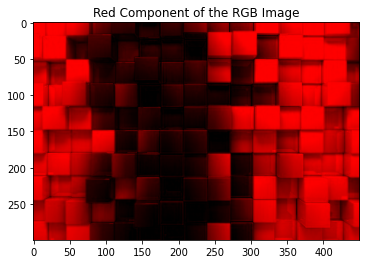

In [ ]:
# Now lets split the image into its red, green and blue channels and display them
# For this, lets make a copy of the image(without overwriting our original image)
# Then, set all other channels other than the one you want to zero and display it
red_image = image_colors_RGB.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0
plt.imshow(red_image)
plt.title('Red Component of the RGB Image')
plt.show()
cv2.imwrite('Red_image.png',red_image);

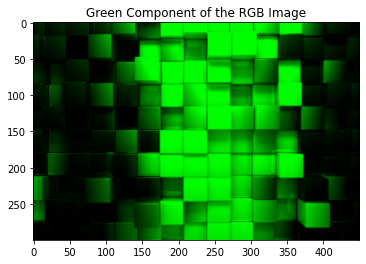

In [ ]:
green_image = image_colors_RGB.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0
plt.imshow(green_image)
plt.title('Green Component of the RGB Image')
plt.show()
cv2.imwrite('Green_image.png',green_image);

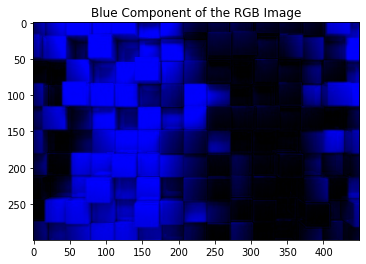

In [ ]:
blue_image = image_colors_RGB.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0
plt.imshow(blue_image)
plt.title('Blue Component of the RGB Image')
plt.show()
cv2.imwrite('Blue_image.png',blue_image);

#### Observations
- The need for converting the image to RGB for correct color display is because we loaded the image using opencv which uses BGR format(images are multi-dimensional arrays) by default, but we use matplotlib to display those images, which follows RGB format. So Inorder to correctly display the colors, we need to convert the format of the image.

- Each of the color components individually describe how much of the red, green and blue colors are present in its pure form and mixed form in the image. The darker each color is, it represents that the original image has more proportion of that color and less proportion of other colors mixed with and vice versa.

### [TODO - 2]

- Convert color from BGR to HSV

In [ ]:
# Converting the BGR image to HSV format
image_colors_HSV = cv2.cvtColor(image_colors,cv2.COLOR_BGR2HSV)

- Code to **display results**.

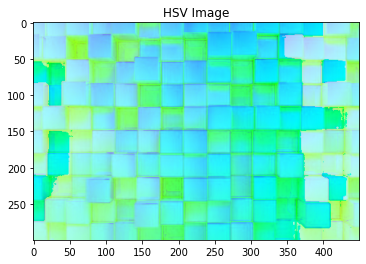

In [ ]:
# Now displaying the convert RGB format of the image
plt.imshow(image_colors_HSV)
plt.title('HSV Image')
plt.show()
cv2.imwrite('Colors_HSV_image.png',image_colors_HSV);

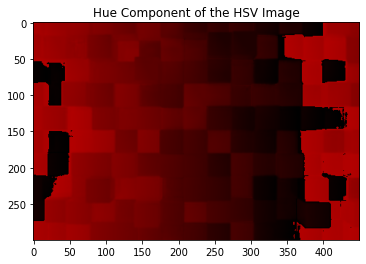

In [ ]:
# Now, lets display each of the three channels(Hue, Saturation and Value components)seperately
hue_image = image_colors_HSV.copy()
hue_image[:, :, 1] = 0
hue_image[:, :, 2] = 0
plt.imshow(hue_image)
plt.title('Hue Component of the HSV Image')
plt.show()
cv2.imwrite('Hue_image.png',hue_image);

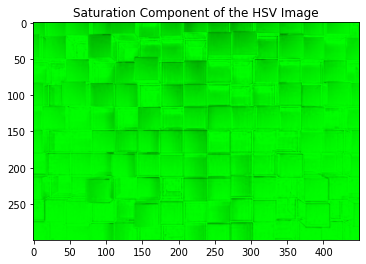

In [ ]:
sat_image = image_colors_HSV.copy()
sat_image[:, :, 0] = 0
sat_image[:, :, 2] = 0
plt.imshow(sat_image)
plt.title('Saturation Component of the HSV Image')
plt.show()
cv2.imwrite('Saturation_image.png',sat_image);

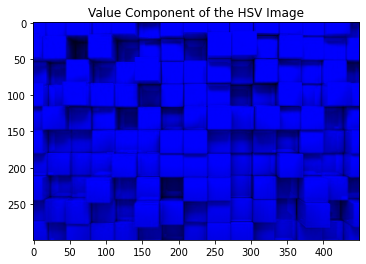

In [ ]:
val_image = image_colors_HSV.copy()
val_image[:, :, 0] = 0
val_image[:, :, 1] = 0
plt.imshow(val_image)
plt.title('Value Component of the HSV Image')
plt.show()
cv2.imwrite('Value_image.png',val_image);

#### Discuss your observations here (modify this cell)
- Again, since opencv reads an image in BGR format, we need to convert it into HSV format for displaying hue, saturation and value components seperately.

- Hue component tells the color portion of the image. Saturation tells the amount of grayness present in the image. Value describes the intensity or brightness present in the image.

### [TODO - 3]

- Code for finding the mask for blue color pixels

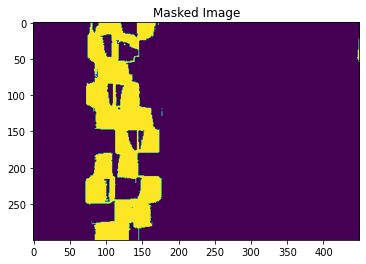

In [ ]:
#First lets find the pixels which are in the range of blue color and output as a binary mask
image_mask = cv2.inRange(image_colors_HSV,np.array([110,50,50]),np.array([130,255,255]))

plt.imshow(image_mask)
plt.title('Masked Image')
plt.show()
cv2.imwrite('Masked_image.png',image_mask);

- Code for extraction of blue parts (Use the bitwise AND)


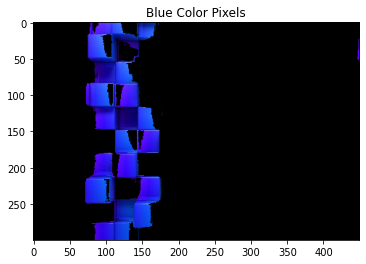

In [ ]:
# Now, lets diplay only the blue parts
image_result_BGR = cv2.bitwise_and(image_colors,image_colors, mask= image_mask)
# Again, we need to convert BGR to RGB for correct display of colors
image_result_RGB = cv2.cvtColor(image_result_BGR,cv2.COLOR_BGR2RGB)
plt.imshow(image_result_RGB)
plt.title('Blue Color Pixels')
plt.show()

- Code to **display results**. If using matplotlib.pyplot to display image, convert to RGB for correct color display.
- Code to **save resulting images** 

In [ ]:
cv2.imwrite('Blue_pixel image.png',image_result_BGR);

## PART 2

### [TODO - 4]

- Code to read the image

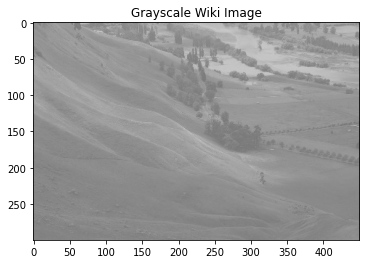

In [ ]:
# Loading and displaying the image in grayscale format
image_wiki = cv2.imread('wiki.jpg', 0)
# Again, convert the format from BGR to RGB for correct color display
image_wiki_RGB = cv2.cvtColor(image_wiki,cv2.COLOR_BGR2RGB)
# Displaying the Image
plt.imshow(image_wiki_RGB)
plt.title('Grayscale Wiki Image')
plt.show()
cv2.imwrite('Grayscale_image.png',image_wiki);

### [TODO - 5]

- Find the Histogram

In [ ]:
hist_wiki = np.histogram(image_wiki_RGB.flatten(),256,[0,256])

- **Plot the Histogram**

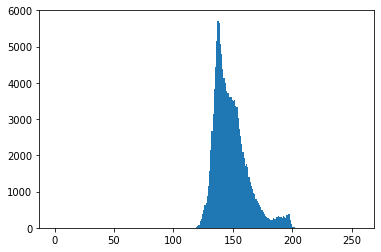

In [ ]:
plt.hist(image_wiki.ravel(),256,[0,256]) 
plt.show()

#### Discuss your observations here (modify this cell)
Now, from the above histogram plot, we see the pixel intensity distribution and most of them are accumulated between 100 to 200. So, In order to enhance the image contrast, we need to equalize this histogram and flatten the pixel distribution.

### [TODO - 6]

- Calculate the CDF


In [ ]:
img=image_wiki_RGB
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()

- **Plot the CDF**

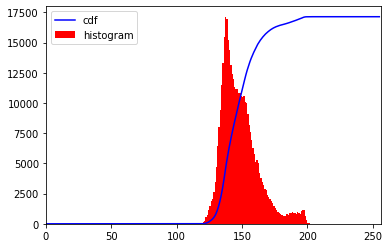

In [ ]:
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Discuss your comments here (modify this cell)

The grayscale image is bright, but it looks faded. Hence there is a need to enhance the contrast. From the histogram plot, we see the pixel intensities are concentrated between 120 to 200.In this region, the pixels are lightly shaded hence the bright appearance. Due to the narrow intensity range, the pixels are very similar in shades, resulting in faded appearance. In this narrow region, the cumulative histogram is increasing with a steep slope while being flat elsewhere.

Thus, Applying CDF equalization will give better results

### [TODO - 7]

- Apply Histogram Equilization

In [ ]:
equ = cv2.equalizeHist(image_wiki)

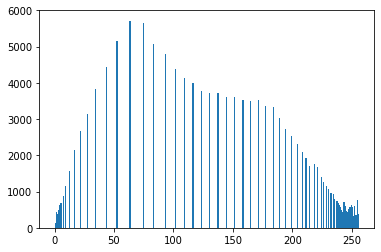

In [ ]:
plt.hist(equ.ravel(),256,[0,256]) 
plt.show()

- From the histogram plot above , we see that the pixel intensities are uniformly distributed across the full range of values (each intensity value is equally probable), and
the cumulative histogram is increasing linearly across the full intensity range.


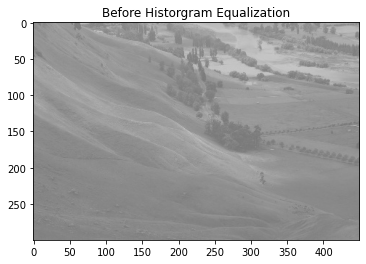

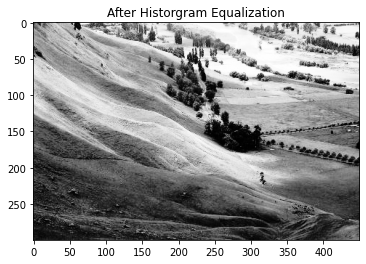

In [ ]:
equ_wiki_RGB = cv2.cvtColor(equ,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(image_wiki_RGB)
plt.title('Before Historgram Equalization')
plt.figure(2)
plt.imshow(equ_wiki_RGB,vmin=0,vmax=255)
plt.title('After Historgram Equalization')
plt.show()

Now, we see a clear improvement in the contrast of the image.